In [ ]:

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.decomposition import PCA
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.decomposition import PCA
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import cross_val_score
sns.set()
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn import model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


In [ ]:
import os
os.getcwd()
os.chdir('C:\\Users\\serge\\thinkful\\SUPERVISED LEARNING\cap_project')

# Data cleaning

Brand of the car  is an important feature when buying cars. We will include it in the dataset. Also, age makes more sense vs year.

In [ ]:

#read the data
#
df_audi=pd.read_csv('audi.csv')
df_audi['brand']='audi'
df_bmw=pd.read_csv('bmw.csv')
df_bmw['brand']='bmw'
df_cclass=pd.read_csv('cclass.csv')
df_cclass['brand']='cclass'
df_focus=pd.read_csv('focus.csv')
df_focus['brand']='focus'
df_ford=pd.read_csv('ford.csv')
df_ford['brand']='ford'
df_hyundi=pd.read_csv('hyundi.csv')
df_hyundi['brand']='hyundi'
df_hyundi = df_hyundi.rename(columns={'tax(£)': 'tax'})
df_merc=pd.read_csv('merc.csv')
df_merc['brand']='merc'
df_skoda=pd.read_csv('skoda.csv')
df_skoda['brand']='skoda'
df_toyota=pd.read_csv('toyota.csv')
df_toyota['brand']='toyota'
df_vauxhall=pd.read_csv('vauxhall.csv')
df_vauxhall['brand']='vauxhall'
df_vw=pd.read_csv('vw.csv')
df_vw['brand']='vw'

In [ ]:
#merging the data
df=pd.concat([df_audi, df_bmw, df_cclass, df_focus, df_ford, df_hyundi, df_merc, df_skoda, df_toyota, df_vauxhall, df_vw], ignore_index=True)

In [ ]:
df.head(100)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand
0,A1,2017,12500,Manual,15735,Petrol,150.0,55.4,1.4,audi
1,A6,2016,16500,Automatic,36203,Diesel,20.0,64.2,2.0,audi
2,A1,2016,11000,Manual,29946,Petrol,30.0,55.4,1.4,audi
3,A4,2017,16800,Automatic,25952,Diesel,145.0,67.3,2.0,audi
4,A3,2019,17300,Manual,1998,Petrol,145.0,49.6,1.0,audi
...,...,...,...,...,...,...,...,...,...,...
95,A6,2016,17300,Automatic,24421,Diesel,30.0,61.4,2.0,audi
96,A1,2016,10600,Manual,15567,Diesel,0.0,76.3,1.6,audi
97,A4,2018,17500,Manual,15207,Petrol,145.0,51.4,1.4,audi
98,A4,2017,15000,Manual,14864,Petrol,145.0,52.3,1.4,audi


In [ ]:
df.isnull().sum()/df.isnull().count()

model           0.000000
year            0.000000
price           0.000000
transmission    0.000000
mileage         0.000000
fuelType        0.000000
tax             0.086171
mpg             0.086171
engineSize      0.000000
brand           0.000000
dtype: float64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108540 entries, 0 to 108539
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108540 non-null  object 
 1   year          108540 non-null  int64  
 2   price         108540 non-null  int64  
 3   transmission  108540 non-null  object 
 4   mileage       108540 non-null  int64  
 5   fuelType      108540 non-null  object 
 6   tax           99187 non-null   float64
 7   mpg           99187 non-null   float64
 8   engineSize    108540 non-null  float64
 9   brand         108540 non-null  object 
dtypes: float64(3), int64(3), object(4)
memory usage: 8.3+ MB


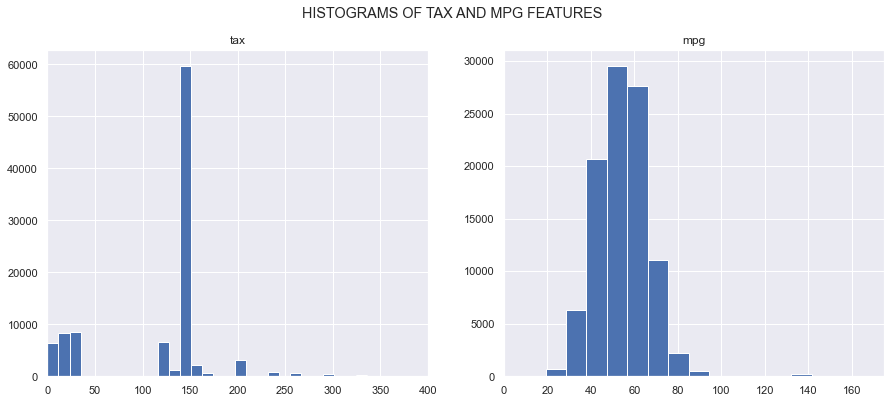

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6))
axs[0].hist(df['tax'],bins=50)
axs[0].set_xlim([0,400])
axs[0].set_title('tax')
axs[1].hist(df['mpg'], bins=50)
axs[1].set_xlim([0,175])
axs[1].set_title('mpg')
fig.suptitle('HISTOGRAMS OF TAX AND MPG FEATURES')
plt.show()

In [ ]:
#will use mode for tax and median for mpg to fill 8.6% of missing values
df['tax'].fillna(145, inplace=True)
df['mpg'].fillna(df['mpg'].mean(), inplace=True)

In [ ]:
df['age']=2021-df['year']


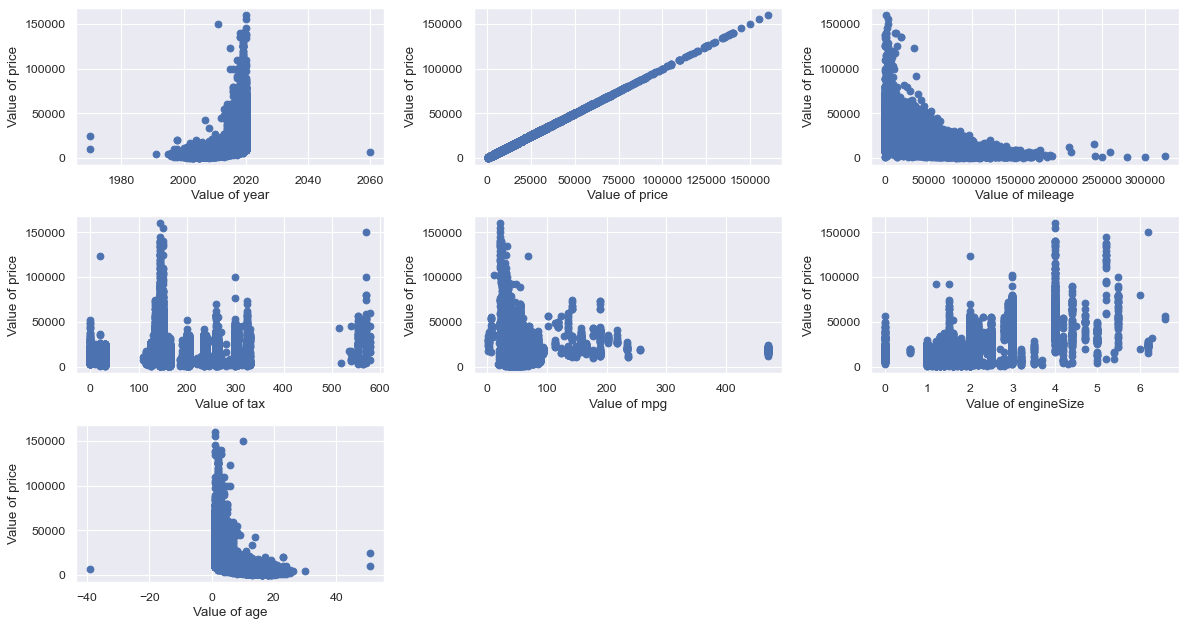

In [ ]:
num_col=['year','price','mileage','tax','mpg','engineSize','age']
plt.figure(figsize=(15, 8), dpi=80)
for idx, c in enumerate(num_col):
    plt.subplot(3,3,idx+1)
    plt.scatter(df[c], df['price'])
    plt.xlabel('Value of '+c  )
    plt.ylabel('Value of price')
plt.tight_layout()
plt.show()

There is an unusual value for the year, let's look at the observation closely. Also, later in the process I discovered 286 observation with engineSize equals 0, because the number is small I will delete the rows.

In [ ]:
df[df['year']>2020]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,age
48528,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4,ford,-39


In [ ]:
df[df['engineSize']==0]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,brand,age
7505,Q5,2019,44790,Automatic,5886,Petrol,135.0,117.7,0.0,audi,2
7506,Q3,2019,32788,Automatic,1500,Diesel,145.0,47.1,0.0,audi,2
7516,Q3,2020,29944,Manual,1500,Petrol,145.0,40.9,0.0,audi,1
7517,Q3,2020,33333,Automatic,1500,Diesel,145.0,47.1,0.0,audi,1
7518,Q3,2020,29944,Automatic,1500,Petrol,145.0,32.5,0.0,audi,1
...,...,...,...,...,...,...,...,...,...,...,...
105031,Tiguan,2016,15300,Manual,38398,Diesel,145.0,53.3,0.0,vw,5
105038,Tiguan,2018,24000,Automatic,22200,Diesel,145.0,47.9,0.0,vw,3
106204,Up,2017,8500,Manual,20324,Petrol,20.0,64.2,0.0,vw,4
106262,Up,2017,8000,Manual,24444,Petrol,20.0,60.1,0.0,vw,4


In [ ]:
zero_index=df[df['engineSize']==0].index.tolist()

zero_index.append(48528)

In [ ]:
#only one entry, we'll just delete it

df.drop(zero_index, axis='index', inplace=True)
df.reset_index(drop=True, inplace=True)

# Outliers

In [ ]:
# we'll use log transform later
#sns.catplot(x=df['model'], y=df['price'], kind="boxen",
#           data=df.sort_values("model"))

sns.catplot(x=df['transmission'], y=df['price'], kind="boxen",
            data=df.sort_values("transmission"))

sns.catplot(x=df['fuelType'], y=df['price'], kind="boxen",
            data=df.sort_values("fuelType"))

g=sns.catplot(x=df['brand'], y=df['price'], kind="boxen",
            data=df.sort_values("brand"))  
g.set_xticklabels(rotation=30)

plt.tight_layout()

NameError: ignored

In [ ]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Multicollinearity is not a huge proble in our case, I can see ony age - mileage pair with high collinearity.

# Mutual information

In [ ]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [ ]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show features with their MI scores

model           0.786104
engineSize      0.422334
mpg             0.416606
mileage         0.415068
year            0.364941
age             0.363006
brand           0.347841
transmission    0.258483
tax             0.194231
fuelType        0.075925
Name: MI Scores, dtype: float64

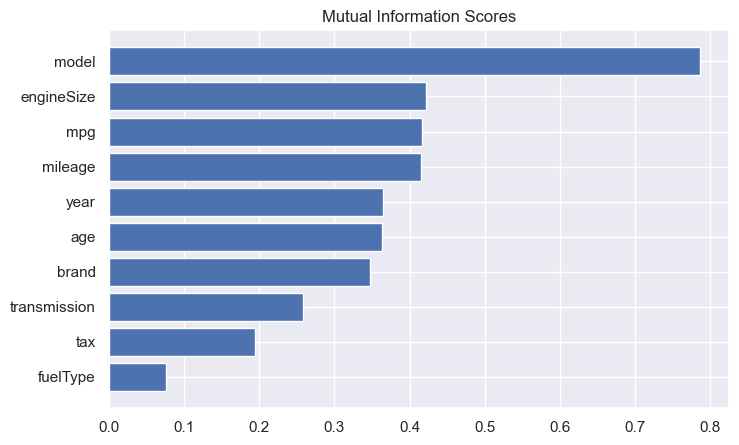

In [ ]:
# to compare features vusually create a plot
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

model is the biggest contributor into varience of the target

Text(0.5, 1.0, 'mpg vs price for different fuel types')

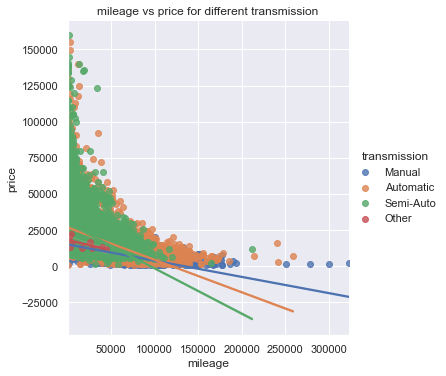

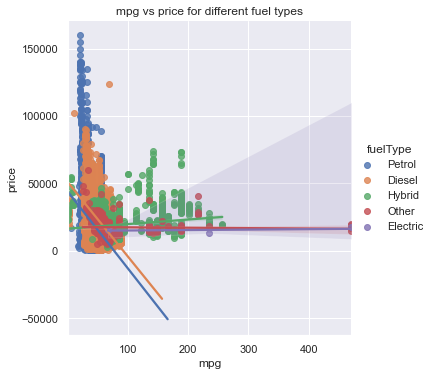

In [ ]:
sns.lmplot(x="mileage", y="price", hue="transmission", data=df)
plt.title('mileage vs price for different transmission')
sns.lmplot(x="mpg", y="price", hue="fuelType", data=df)
plt.title('mpg vs price for different fuel types')

the plots clearly show while fuelType and transmission scored low on MI plot, there is an interaction between fuelType and mpg - two distinct groups, and transmission-mileage - 3 distinct groups with different price changes.

# Principal Componet Analysis


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108253 entries, 0 to 108252
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   model         108253 non-null  object 
 1   year          108253 non-null  int64  
 2   price         108253 non-null  int64  
 3   transmission  108253 non-null  object 
 4   mileage       108253 non-null  int64  
 5   fuelType      108253 non-null  object 
 6   tax           108253 non-null  float64
 7   mpg           108253 non-null  float64
 8   engineSize    108253 non-null  float64
 9   brand         108253 non-null  object 
 10  age           108253 non-null  int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 9.1+ MB


In [ ]:
features = ["mileage", "tax", "mpg", "engineSize",'age']

X = df.copy()
y = X.pop('price')
X = X.loc[:, features]

# Standardize
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [ ]:
#fit PCA
from sklearn.decomposition import PCA

# Create principal components
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Convert to dataframe
component_names = [f"PC{i+1}" for i in range(X_pca.shape[1])]
X_pca = pd.DataFrame(X_pca, columns=component_names)

X_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.292048,0.223990,-0.485656,0.364636,0.236433
1,1.595531,0.157939,1.064332,-0.790885,0.027591
2,1.226956,0.557381,-0.102919,-1.045066,0.081364
3,0.241185,-0.189604,0.734330,0.846121,0.069353
4,-1.199531,1.142641,-0.895536,0.032835,-0.050709


In [ ]:
loadings = pd.DataFrame(
    pca.components_.T,  # transpose the matrix of loadings
    columns=component_names,  # so the columns are the principal components
    index=X.columns,  # and the rows are the original features
)
loadings

,PC1,PC2,PC3,PC4,PC5
mileage,0.548852,-0.411732,-0.108842,0.067408,-0.716134
tax,-0.455030,-0.406276,-0.296474,0.734840,-0.000928
mpg,0.432801,0.418597,0.423938,0.670586,0.089724
engineSize,-0.138699,-0.567722,0.802770,-0.075770,0.090963
age,0.533999,-0.409737,-0.275851,-0.006296,0.686168


The first component (PC1) shows high contarast between older vihicles with high mileage and newer with low mileage, the 4th- contrast between tax and engineSize. Positive loadings indicate a variable and a principal component are positively correlated: an increase in one results in an increase in the other. Negative loadings indicate a negative correlation. Large (either positive or negative) loadings indicate that a variable has a strong effect on that principal component.

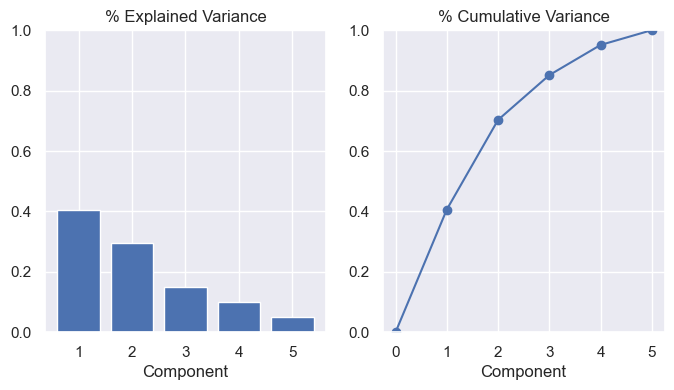

In [ ]:
# Look at explained variance
def plot_variance(pca, width=8, dpi=100):
    # Create figure
    fig, axs = plt.subplots(1, 2)
    n = pca.n_components_
    grid = np.arange(1, n + 1)
    # Explained variance
    evr = pca.explained_variance_ratio_
    axs[0].bar(grid, evr)
    axs[0].set(
        xlabel="Component", title="% Explained Variance", ylim=(0.0, 1.0)
    )
    # Cumulative Variance
    cv = np.cumsum(evr)
    axs[1].plot(np.r_[0, grid], np.r_[0, cv], "o-")
    axs[1].set(
        xlabel="Component", title="% Cumulative Variance", ylim=(0.0, 1.0)
    )
    # Set up figure
    fig.set(figwidth=8, dpi=100)
    return axs
plot_variance(pca);

In [ ]:
mi_scores = make_mi_scores(X_pca, y, discrete_features=False)
mi_scores

PC1    0.552705
PC3    0.455820
PC4    0.382835
PC2    0.304570
PC5    0.196373
Name: MI Scores, dtype: float64

While the first principal components is the largest contributor to the varience of the dependent variable, other components are important enough not to diregard them.

In [ ]:
df["model"] = df["model"].astype("category")
df["transmission"] = df["transmission"].astype("category")
df["fuelType"] = df["fuelType"].astype("category")
df["brand"] = df["brand"].astype("category")

# Establish Baseline
Finally, let's establish a baseline score to judge our feature engineering against

In [ ]:
def score_dataset(X, y, model=xgb.XGBRegressor()):
    # Label encoding for categoricals
    #
    # Label encoding is good for XGBoost and RandomForest, but one-hot
    # would be better for models like Lasso or Ridge. The `cat.codes`
    # attribute holds the category levels.
    for colname in X.select_dtypes(["category"]):
        X[colname] = X[colname].cat.codes
    # Metric is RMSLE (Root Mean Squared Log Error)
    log_y = np.log(y)
    score = cross_val_score(
        model, X, log_y, cv=5, scoring="neg_mean_squared_error",
    )
    score = -1 * score.mean()
    score = np.sqrt(score)
    return score

In [ ]:
X = df.copy()
y = X.pop("price")

baseline_score = score_dataset(X, y)
print(f"Baseline score: {baseline_score:.5f} RMSLE")

Baseline score: 0.25839 RMSLE


In [ ]:
def make_mi_scores(X, y):
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [ ]:
X = df.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)
mi_scores

model           0.814089
mileage         0.809318
engineSize      0.423454
mpg             0.417586
year            0.361903
age             0.361903
brand           0.345241
transmission    0.262695
tax             0.193936
fuelType        0.072586
Name: MI Scores, dtype: float64

In [ ]:
#delete uninformative/redundant features, we already use age variable instead of year.
df.drop(['year'], axis=1, inplace=True)

X = df.copy()
y = X.pop("price")


score_dataset(X, y)

0.25919670959397806

In [ ]:
df['mileage_age']=df['mileage']/df['age']
X = df.copy()
y = X.pop("price")


score_dataset(X, y)

0.25236318420418474

In [ ]:
df['tax_engineSize']=df['tax']*df['engineSize']
X = df.copy()
y = X.pop("price")


score_dataset(X, y)


0.25118991216524367

In [ ]:
X = df.copy()
y = X.pop("price")

mi_scores = make_mi_scores(X, y)
mi_scores

model             0.810773
mileage           0.806799
tax_engineSize    0.634813
engineSize        0.424483
mpg               0.413722
age               0.365094
brand             0.343907
mileage_age       0.281572
transmission      0.261056
tax               0.192388
fuelType          0.073598
Name: MI Scores, dtype: float64

# Comparing models

<AxesSubplot:xlabel='price', ylabel='Count'>

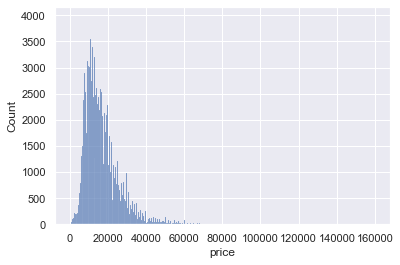

In [ ]:
#target distribution is skewed, use log transformation to normalize it
df['price_log']=np.log(df['price'])
sns.histplot(df['price'])


<AxesSubplot:xlabel='price_log', ylabel='Count'>

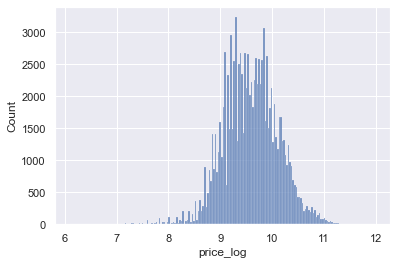

In [ ]:
sns.histplot(df['price_log'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108253 entries, 0 to 108252
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   model           108253 non-null  category
 1   price           108253 non-null  int64   
 2   transmission    108253 non-null  category
 3   mileage         108253 non-null  int64   
 4   fuelType        108253 non-null  category
 5   tax             108253 non-null  float64 
 6   mpg             108253 non-null  float64 
 7   engineSize      108253 non-null  float64 
 8   brand           108253 non-null  category
 9   age             108253 non-null  int64   
 10  mileage_age     108253 non-null  float64 
 11  tax_engineSize  108253 non-null  float64 
 12  price_log       108253 non-null  float64 
dtypes: category(4), float64(6), int64(3)
memory usage: 8.0 MB


Scaling the features will make machine learning algorithns to perform better. All coefficient interpretation will change to units snandard deviation.

In [ ]:
#scaling numerical features
num_col=[col for col in df.columns if (df[col].dtypes=='int64') | (df[col].dtypes=='float64')]
num_col.remove('price')
num_col.remove('price_log')
cat_col=[col for col in df.columns if (df[col].dtype.name=='category')]
X = df[num_col]
data_scaler = StandardScaler()
data_scaler.fit(X)
data_trans=data_scaler.transform(X)
data_scaled = pd.DataFrame(data_trans, columns=[num_col])
data_scaled
#data_transform = pd.concat([data_scaled,df[cat_col]], axis=1, ignore_index=True)
#data_transform

,mileage,tax,mpg,engineSize,age,mileage_age,tax_engineSize
0,-0.344395,0.453605,0.027209,-0.482651,0.046176,-0.390387,-0.017527
1,0.621769,-1.686935,0.679993,0.605888,0.517615,0.578206,-1.039625
2,0.326416,-1.522279,0.027209,-0.482651,0.517615,0.211665,-1.027600
3,0.137884,0.371276,0.909952,0.605888,0.046176,0.357766,0.463461
4,-0.992832,0.371276,-0.403036,-1.208344,-0.896703,-1.249991,-0.408329
...,...,...,...,...,...,...,...
108248,2.405925,0.041962,0.286839,0.605888,2.403373,0.865729,0.222967
108249,3.071591,0.371276,-0.647830,-0.845498,4.289130,0.442438,-0.233971
108250,2.217111,1.276889,-0.966805,-0.482651,3.817691,0.166010,0.403337
108251,2.816786,0.453605,-0.647830,-0.845498,5.232009,0.072359,-0.197897


In [ ]:
data_transform = pd.concat([data_scaled,df[cat_col]], axis=1)
data_transform

,"(mileage,)","(tax,)","(mpg,)","(engineSize,)","(age,)","(mileage_age,)","(tax_engineSize,)",model,transmission,fuelType,brand
0,-0.344395,0.453605,0.027209,-0.482651,0.046176,-0.390387,-0.017527,A1,Manual,Petrol,audi
1,0.621769,-1.686935,0.679993,0.605888,0.517615,0.578206,-1.039625,A6,Automatic,Diesel,audi
2,0.326416,-1.522279,0.027209,-0.482651,0.517615,0.211665,-1.027600,A1,Manual,Petrol,audi
3,0.137884,0.371276,0.909952,0.605888,0.046176,0.357766,0.463461,A4,Automatic,Diesel,audi
4,-0.992832,0.371276,-0.403036,-1.208344,-0.896703,-1.249991,-0.408329,A3,Manual,Petrol,audi
...,...,...,...,...,...,...,...,...,...,...,...
108248,2.405925,0.041962,0.286839,0.605888,2.403373,0.865729,0.222967,Eos,Manual,Diesel,vw
108249,3.071591,0.371276,-0.647830,-0.845498,4.289130,0.442438,-0.233971,Fox,Manual,Petrol,vw
108250,2.217111,1.276889,-0.966805,-0.482651,3.817691,0.166010,0.403337,Fox,Manual,Petrol,vw
108251,2.816786,0.453605,-0.647830,-0.845498,5.232009,0.072359,-0.197897,Fox,Manual,Petrol,vw


In [ ]:
data_transform.columns=['mileage','tax','mpg','engineSize','age','mileage_age','tax_engineSize','model','transmission','fuelType','brand']

In [ ]:
df_dummies = pd.get_dummies(data_transform, drop_first= True)
df_dummies

,mileage,tax,mpg,engineSize,age,mileage_age,tax_engineSize,model_ 2 Series,model_ 3 Series,model_ 4 Series,...,brand_bmw,brand_cclass,brand_focus,brand_ford,brand_hyundi,brand_merc,brand_skoda,brand_toyota,brand_vauxhall,brand_vw
0,-0.344395,0.453605,0.027209,-0.482651,0.046176,-0.390387,-0.017527,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.621769,-1.686935,0.679993,0.605888,0.517615,0.578206,-1.039625,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.326416,-1.522279,0.027209,-0.482651,0.517615,0.211665,-1.027600,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.137884,0.371276,0.909952,0.605888,0.046176,0.357766,0.463461,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-0.992832,0.371276,-0.403036,-1.208344,-0.896703,-1.249991,-0.408329,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108248,2.405925,0.041962,0.286839,0.605888,2.403373,0.865729,0.222967,0,0,0,...,0,0,0,0,0,0,0,0,0,1
108249,3.071591,0.371276,-0.647830,-0.845498,4.289130,0.442438,-0.233971,0,0,0,...,0,0,0,0,0,0,0,0,0,1
108250,2.217111,1.276889,-0.966805,-0.482651,3.817691,0.166010,0.403337,0,0,0,...,0,0,0,0,0,0,0,0,0,1
108251,2.816786,0.453605,-0.647830,-0.845498,5.232009,0.072359,-0.197897,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
X = df_dummies
y= df['price_log']

In [ ]:
def test_models(models, X,y, iterations = 100):
    results = {}
    for i in models:
        r2_train = []
        r2_test = []
        for j in range(iterations):
            x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
            models[i].fit(x_train,y_train).predict(x_train)
            r2_train.append(models[i].fit(x_train,y_train).score(x_train, y_train))
            models[i].fit(x_train,y_train).predict(x_test)
            r2_test.append(models[i].fit(x_train,y_train).score(x_test, y_test))
            
            results[i] = [np.mean(r2_train), np.mean(r2_test)]
           
    return pd.DataFrame(results)


In [ ]:
models = {'OLS': LinearRegression(),'Lasso': Lasso(),'Ridge': Ridge()}

test_models(models, X, y)

,OLS,Lasso,Ridge
0,9.415538e-01,0.000000,0.941398
1,-3.665134e+17,-0.000066,0.941125


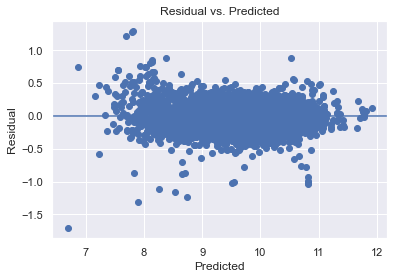

In [ ]:
rrm=Ridge()
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size= 0.2)
rrm.fit(x_train,y_train).predict(x_train)

y_pred=rrm.predict(x_test)
y_residuals=y_pred-y_test
plt.scatter((y_pred),y_residuals)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

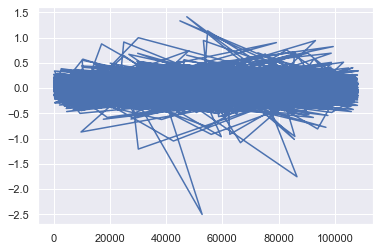

In [ ]:
plt.plot(y_residuals)
plt.show()

c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
c:\users\serge\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


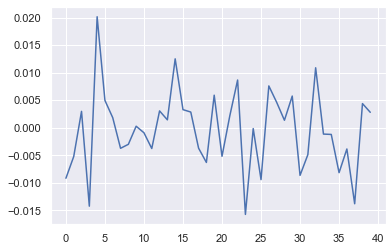

In [ ]:
from statsmodels.tsa.stattools import acf

acf_data = acf(y_residuals)

plt.plot(acf_data[1:])
plt.show()

In our case Ridge performed better, because we have many significant parameters.

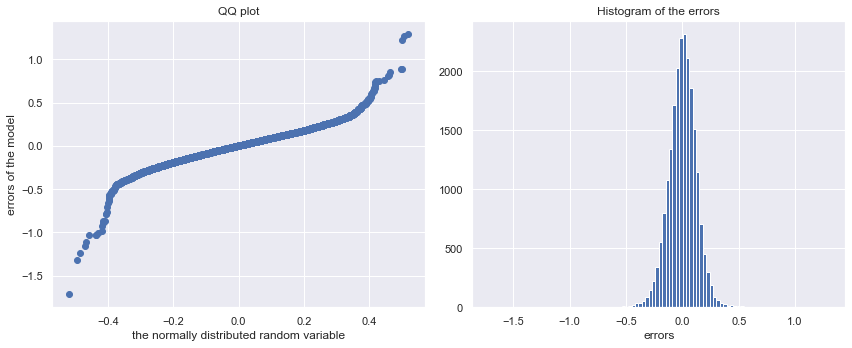

In [ ]:
rand_nums = np.random.normal(np.mean(y_residuals), np.std(y_residuals), len(y_residuals))

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(np.sort(rand_nums), np.sort(y_residuals)) # Sort the arrays
plt.xlabel("the normally distributed random variable")
plt.ylabel("errors of the model")
plt.title("QQ plot")

plt.subplot(1,2,2)
plt.hist(y_residuals, bins=100)
plt.xlabel("errors")
plt.title("Histogram of the errors")

plt.tight_layout()
plt.show()

looks like there are some extreme values of residiuals, compared to normal distribution.

# Gradient boosting regressor

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.20)

In [ ]:
boosting = GradientBoostingRegressor(n_estimators= 100, learning_rate= 0.1, max_depth=10)
boosting.fit(x_train, y_train)
y_pred_train = boosting.predict(x_train)
y_pred_test =boosting.predict(x_test)

In [ ]:
mse_gb_train= mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
mse_gb_test= mean_squared_error(np.exp(y_test), np.exp(y_pred_test))
mse_abs_gb_train = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
mse_abs_gb_test = mean_absolute_error(np.exp(y_test), np.exp(y_pred_test))                                    

rmse_gb_train = np.sqrt(mse_gb_train)
rmse_gb_test = np.sqrt(mse_gb_test)

print("Train:", mse_gb_train)
print("Test:", mse_gb_test)
print("Train:", mse_abs_gb_train)
print("Test:", mse_abs_gb_test)
print("Train:", rmse_gb_train)
print("Test:", rmse_gb_test)

Train: 2574180.4847818525
Test: 4831823.867854407
Train: 1049.697864655834
Test: 1220.4199093091545
Train: 1604.4252817697222
Test: 2198.14100272353


In [ ]:
r2_boosting_test = boosting.score(x_test,y_test )
r2_boosting_train = boosting.score(x_train,y_train )
print(r2_boosting_train)
r2_boosting_test

0.9761243280518278


0.9626541846332372

In [ ]:
scores_boosting = pd.DataFrame(data = np.round([r2_boosting_train, r2_boosting_test, mse_gb_train, mse_gb_test, rmse_gb_train, rmse_gb_test, mse_abs_gb_train, mse_abs_gb_test],2), index =['r2_train', 'r2_test', 'mse_train', 'mse_test', 'rmse_train', 'rmse_test', 'mse_abs_train', 'mse_abs_test'], columns=['scores'])
scores_boosting

,scores
r2_train,0.98
r2_test,0.96
mse_train,2574180.48
mse_test,4831823.87
rmse_train,1604.43
rmse_test,2198.14
mse_abs_train,1049.70
mse_abs_test,1220.42


In [ ]:
score_b= cross_val_score(boosting, X, y, cv=20, n_jobs=-1)
score_b

array([0.93717934, 0.9419186 , 0.90530611, 0.92965091, 0.9271168 ,
       0.94497248, 0.93143649, 0.92906173, 0.92879595, 0.91364872,
       0.92870113, 0.95191425, 0.93629955, 0.80896553, 0.7780055 ,
       0.74762868, 0.74675937, 0.89447503, 0.88892678, 0.8313307 ])

# Decision Tree regressor

In [ ]:
tree_regressor = DecisionTreeRegressor(max_depth=15)
tree_regressor.fit(x_train, y_train)
y_pred_train = tree_regressor.predict(x_train)
y_pred_test = tree_regressor.predict(x_test)

In [ ]:
mse_dtr_train= mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
mse_dtr_test= mean_squared_error(np.exp(y_test), np.exp(y_pred_test))
mse_abs_dtr_train = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
mse_abs_dtr_test = mean_absolute_error(np.exp(y_test), np.exp(y_pred_test))                                    

rmse_dtr_train = np.sqrt(mse_dtr_train)
rmse_dtr_test = np.sqrt(mse_dtr_test)

print("Train:", mse_dtr_train)
print("Test:", mse_dtr_test)
print("Train:", mse_abs_dtr_train)
print("Test:", mse_abs_dtr_test)
print("Train:", rmse_dtr_train)
print("Test:", rmse_dtr_test)

Train: 4079305.034608298
Test: 7145347.153574238
Train: 1259.548592083217
Test: 1565.7114935538732
Train: 2019.7289507773805
Test: 2673.0782168829696


In [ ]:
r2_dt_test = tree_regressor.score(x_test,y_test )
r2_dt_train = tree_regressor.score(x_train,y_train )
print(r2_dt_train)
r2_dt_test

0.9597112933979298


0.9331449685121723

In [ ]:
scores_DT = pd.DataFrame(data = np.round([r2_dt_train, r2_dt_test, mse_dtr_train, mse_dtr_test, rmse_dtr_train, rmse_dtr_test, mse_abs_dtr_train, mse_abs_dtr_test], 2), index =['r2_train', 'r2_test', 'mse_train', 'mse_test', 'rmse_train', 'rmse_test', 'mse_abs_train', 'mse_abs_test'], columns=['scores'])
scores_DT

,scores
r2_train,0.96
r2_test,0.93
mse_train,4079305.03
mse_test,7145347.15
rmse_train,2019.73
rmse_test,2673.08
mse_abs_train,1259.55
mse_abs_test,1565.71


# Random Forest Regressor

In [ ]:
random_forest_reg = RandomForestRegressor(max_depth = 20, max_features = 'auto', n_estimators = 100)
random_forest_reg.fit(x_train, y_train)

y_pred_train = random_forest_reg.predict(x_train)
y_pred_test = random_forest_reg.predict(x_test)

In [ ]:
r2_rfr_test = random_forest_reg.score(x_test, y_test)
r2_rfr_train = random_forest_reg.score(x_train, y_train)
r2_rfr_test, r2_rfr_train

(0.9602322044016995, 0.9845940589843581)

In [ ]:
mse_rfg_train= mean_squared_error(np.exp(y_train), np.exp(y_pred_train))
mse_rfg_test= mean_squared_error(np.exp(y_test), np.exp(y_pred_test))
mse_abs_rfg_train = mean_absolute_error(np.exp(y_train), np.exp(y_pred_train))
mse_abs_rfg_test = mean_absolute_error(np.exp(y_test), np.exp(y_pred_test))                                    

rmse_rfg_train = np.sqrt(mse_rfg_train)
rmse_rfg_test = np.sqrt(mse_rfg_test)

print("Train:", mse_rfg_train)
print("Test:", mse_rfg_test)
print("Train:", mse_abs_rfg_train)
print("Test:", mse_abs_rfg_test)
print("Train:", rmse_rfg_train)
print("Test:", rmse_rfg_test)

Train: 1819563.2089117223
Test: 5034921.465204907
Train: 818.1698765316813
Test: 1219.3761656433064
Train: 1348.911861061249
Test: 2243.8630673917933


In [ ]:
scores_randomforest = pd.DataFrame(data = np.round([r2_rfr_train, r2_rfr_test, mse_rfg_train, mse_rfg_test, rmse_rfg_train, rmse_rfg_test, mse_abs_rfg_train, mse_abs_rfg_test],2), index =['r2_train', 'r2_test', 'mse_train', 'mse_test', 'rmse_train', 'rmse_test', 'mse_abs_train', 'mse_abs_test'], columns=['scores'])
scores_randomforest

,scores
r2_train,0.98
r2_test,0.96
mse_train,1819563.21
mse_test,5034921.47
rmse_train,1348.91
rmse_test,2243.86
mse_abs_train,818.17
mse_abs_test,1219.38


In [ ]:
models_with_scores= pd.concat([scores_DT, scores_boosting, scores_randomforest], axis =1)

cols = ['DecisionTrees', 'GradiantBoosting', 'RandomForest']

models_with_scores.columns = cols

In [ ]:
models_with_scores

,DecisionTrees,GradiantBoosting,RandomForest
r2_train,0.96,0.98,0.98
r2_test,0.93,0.96,0.96
mse_train,4079305.03,2574180.48,1819563.21
mse_test,7145347.15,4831823.87,5034921.47
rmse_train,2019.73,1604.43,1348.91
rmse_test,2673.08,2198.14,2243.86
mse_abs_train,1259.55,1049.70,818.17
mse_abs_test,1565.71,1220.42,1219.38


In [ ]:
n_estimators=range(1,122,10)
scores=[]
for n in n_estimators:
    random_forest_reg = RandomForestRegressor(max_depth = 20, max_features = 'auto', n_estimators = n)
    random_forest_reg.fit(x_train, y_train)
    r2_rfr_test = random_forest_reg.score(x_test, y_test)
    scores.append(r2_rfr_test)

Text(0, 0.5, 'Testing Accuracy')

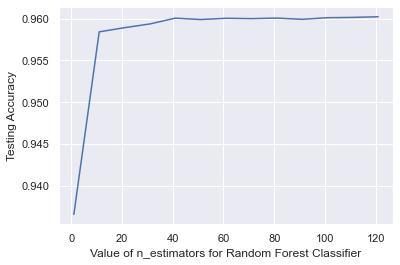

In [ ]:
# plot the relationship between K and testing accuracy
# plt.plot(x_axis, y_axis)
plt.plot(n_estimators, scores)
plt.xlabel('Value of n_estimators for Random Forest Classifier')
plt.ylabel('Testing Accuracy')

In [ ]:
z=pd.DataFrame({'n': n_estimators, 'scores': scores})
z

,n,scores
0,1,0.936596
1,11,0.958412
2,21,0.958913
3,31,0.959358
4,41,0.960051
5,51,0.959884
6,61,0.960034
7,71,0.959993
8,81,0.960058
9,91,0.959909


looks like n=60 the model converges R_2>0.96
It would be nice if dataset included variable for the condition of the vehicle. I think it's an important feature when buying a car.